Find a dataset to build a model with. Find the dataset on Kaggle, Google Datasets, and data.gov, and feel free to explore sources. You will find data related to your mission and MUST( mandatory)  be something aside from house predicting, which was done in class multiple times. Anything contrary to this will result in an immediate zero grade for the entire assignment. You Must:

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd

df = pd.read_csv('crop_production.csv')  # use the downloaded file path
print(df.head())

# 3A. Basic info and missing values
print(df.info())
print(df.isnull().sum())

# 3B. Basic stats
print(df.describe())


                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Cr

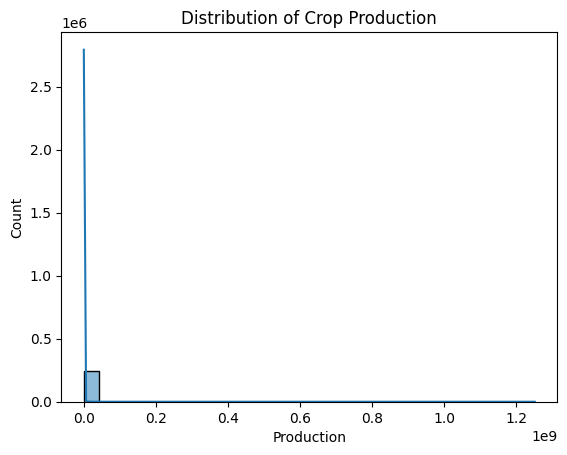

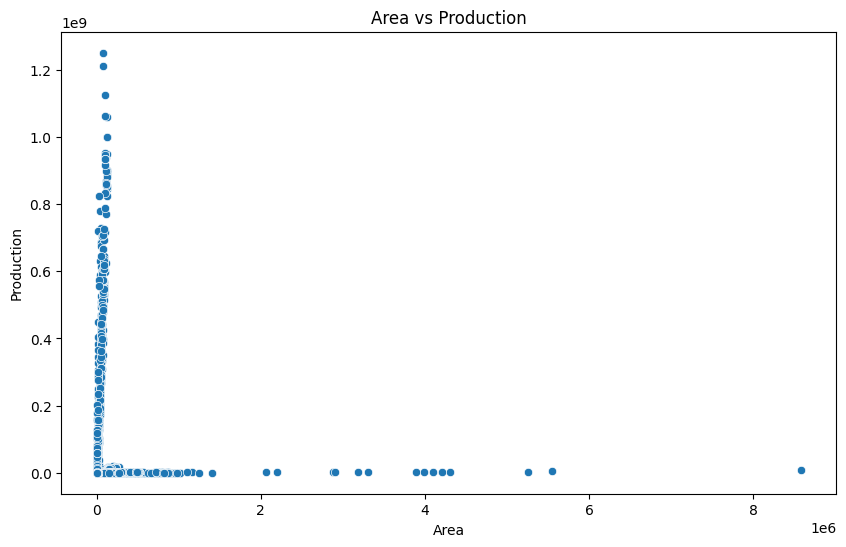

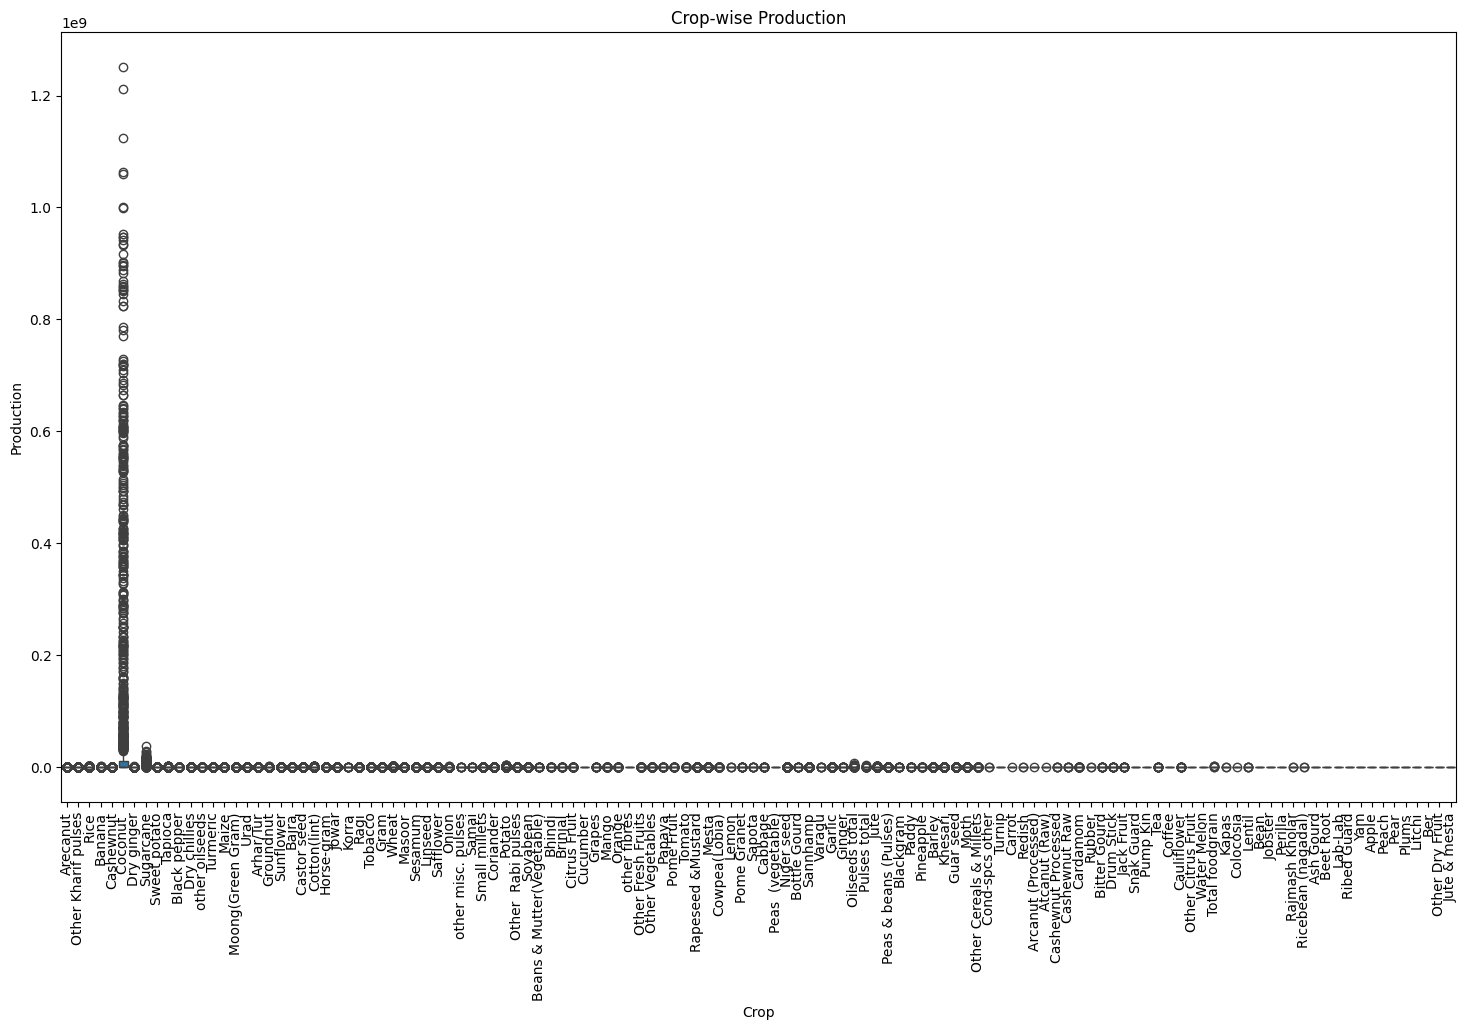

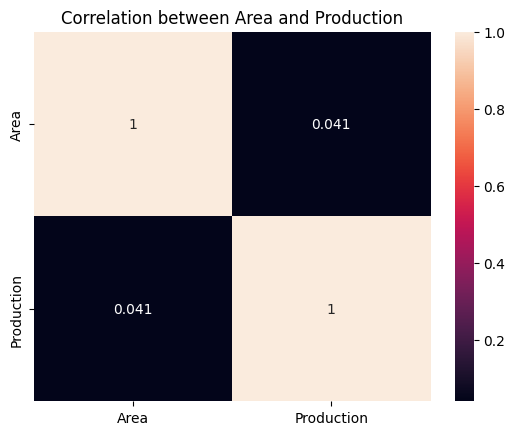

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of target
sns.histplot(df['Production'], bins=30, kde=True)
plt.title("Distribution of Crop Production")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', data=df)
plt.title('Area vs Production')
plt.show()

# Boxplot to see how production varies by crop
plt.figure(figsize=(18, 10))
sns.boxplot(x='Crop', y='Production', data=df)
plt.xticks(rotation=90)
plt.title("Crop-wise Production")
plt.show()

# Correlation heatmap (Area vs Production)
sns.heatmap(df[['Area', 'Production']].corr(), annot=True)
plt.title("Correlation between Area and Production")
plt.show()


In [4]:
# 4A. Drop only if the column exists
if 'District_Name' in df.columns:
    df = df.drop(columns=['District_Name'])  # Keep 'State_Name'


# 4B. Handle missing values
df = df.dropna()

# 4C. Focus on a subset of crops to simplify
top_crops = df['Crop'].value_counts().nlargest(10).index
df = df[df['Crop'].isin(top_crops)]

# 4D. Simplify season feature (no SettingWithCopyWarning and clean indentation)
df.loc[:, 'Is_Kharif'] = df['Season'].apply(
    lambda x: 1 if x.lower() == 'kharif' else 0
)





In [5]:
# 5A. One-hot encode 'Crop' and 'Season'
df = pd.get_dummies(df, columns=['Crop', 'Season', 'State_Name', 'Area'], drop_first=True)



In [18]:
import pandas as pd

# Load your dataset
df = pd.read_csv('crop_production.csv')

# Optional: See the first few rows
print(df.head())


                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load data
df = pd.read_csv('crop_production.csv')

# 6A. Define features and target
X = df.drop(columns=['Production'])  # Features
y = df['Production']                 # Target

# Drop high-cardinality or unneeded columns
X = X.drop(columns=['District_Name'])

# 6B. One-hot encode only categorical variables
X = pd.get_dummies(X, columns=['State_Name', 'Crop', 'Season'], drop_first=True)

# 6C. Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6D. Convert scaled array back to DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)


In [12]:
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (246091, 162)
Target shape: (246091,)


In [13]:
df = pd.read_csv("crop_production.csv")

# Drop rows where Production is NaN
df = df.dropna(subset=['Production'])


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Load and prepare dataset
df = pd.read_csv("crop_production.csv")

# Limit to 1000 rows only
df = df.sample(n=1000, random_state=42).reset_index(drop=True)

# Features and target
X = df.drop(columns=['Production', 'District_Name'])
y = df['Production']

# One-hot encoding
X = pd.get_dummies(X, columns=['State_Name', 'Crop', 'Season', 'Area'], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# 6. Split the clean data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Final check: Drop NaNs in y_train/y_test if still any
y_train = y_train.dropna()
y_test = y_test.dropna()

In [38]:
lr_model = SGDRegressor(max_iter=1, learning_rate='invscaling', eta0=0.01, random_state=42, warm_start=True)
train_losses, test_losses = [], []

# Initialize model
lr_model.partial_fit(X_train, y_train)

best_train_mse = float('inf')
best_test_mse = float('inf')

for epoch in range(1, 101):
    lr_model.partial_fit(X_train, y_train)

    y_train_pred = lr_model.predict(X_train)
    y_test_pred = lr_model.predict(X_test)

    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    if train_loss < best_train_mse:
        best_train_mse = train_loss
    if test_loss < best_test_mse:
        best_test_mse = test_loss

print(f"Linear Regression Best Train MSE: {best_train_mse:.4f}")
print(f"Linear Regression Best Test MSE: {best_test_mse:.4f}")


Linear Regression Best Train MSE: 331898767115041.0625
Linear Regression Best Test MSE: 163598973838920.9688


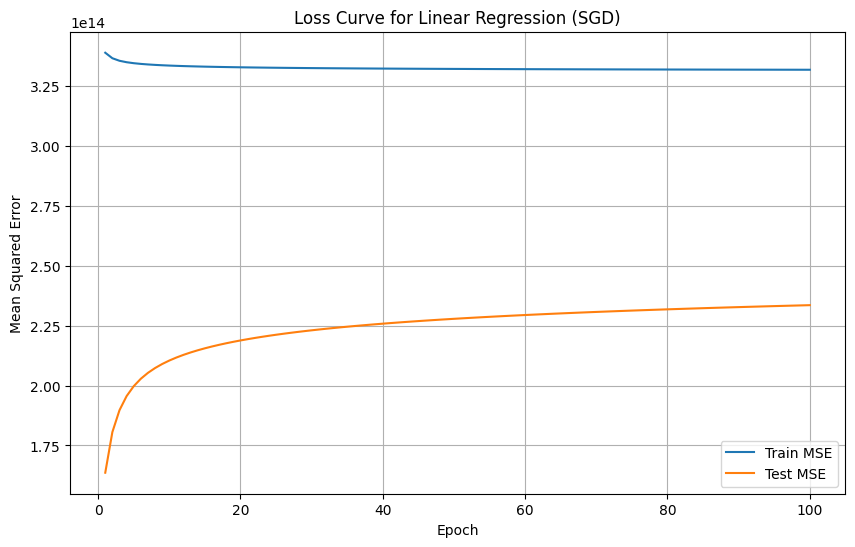

In [39]:
epochs = 100  # Number of iterations you trained your SGDRegressor

# After training loop:
plt.figure(figsize=(10,6))
plt.plot(range(1, epochs+1), train_losses, label='Train MSE')
plt.plot(range(1, epochs+1), test_losses, label='Test MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for Linear Regression (SGD)')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Before Training (Raw Data)')

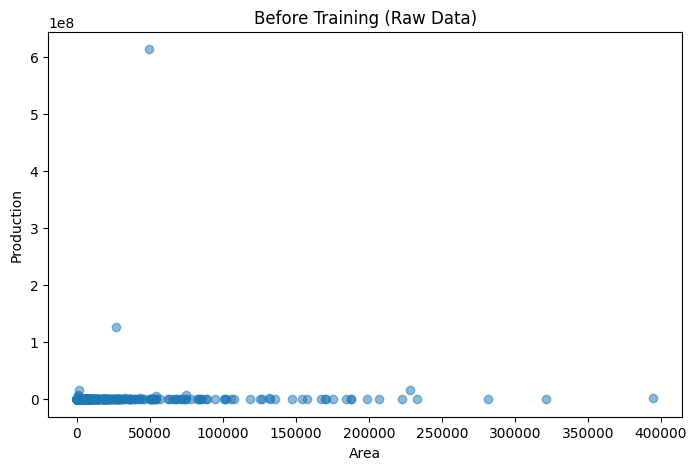

In [41]:
# Step 7: Scatter plots before and after training (Production vs Area)
plt.figure(figsize=(18,5))

# Before training (using original target and unscaled Area)
plt.subplot(1,2,1)
plt.scatter(df['Area'], df['Production'], alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Production')
plt.title('Before Training (Raw Data)')

In [43]:
# Before scaling (save column names)
feature_columns = X.columns

# After scaling (restore X as DataFrame with correct columns)
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=feature_columns)

# Then split again:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
X_test_orig_area = scaler.inverse_transform(
    X_test
)[:, feature_columns.get_loc('Area')]


In [47]:
# Assume you already have this from earlier
feature_columns = X.columns.tolist()

# Find the index of 'Area' in the scaled data
area_index = feature_columns.index('Area')

# Inverse transform the scaled X_test to get original 'Area' values
X_test_orig_unscaled = scaler.inverse_transform(X_test)
X_test_orig_area = X_test_orig_unscaled[:, area_index]

# Get final predictions
y_test_pred_final = lr_model.predict(X_test)


c:\Users\awini\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


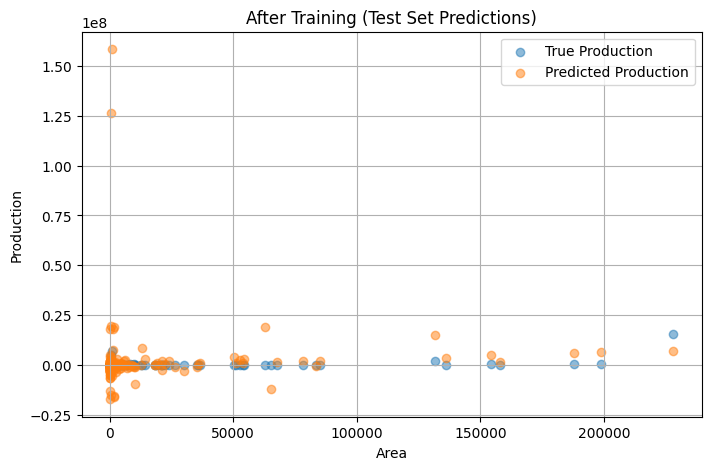

In [49]:
# After training: Plot predicted production on test set vs Area (scaled Area inverse transform to plot)
plt.figure(figsize=(8, 5))
plt.scatter(X_test_orig_area, y_test, alpha=0.5, label='True Production')
plt.scatter(X_test_orig_area, y_test_pred_final, alpha=0.5, label='Predicted Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.title('After Training (Test Set Predictions)')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
# Step 8: Train Decision Tree and Random Forest models
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_mse = mean_squared_error(y_test, tree_model.predict(X_test))

forest_model = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=42)
forest_model.fit(X_train, y_train)
forest_mse = mean_squared_error(y_test, forest_model.predict(X_test))

lr_mse = mean_squared_error(y_test, lr_model.predict(X_test))

print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Decision Tree MSE:     {tree_mse:.2f}")
print(f"Random Forest MSE:     {forest_mse:.2f}")

Linear Regression MSE: 211221035536010.88
Decision Tree MSE:     1940167410439906.25
Random Forest MSE:     202586592367316.66


c:\Users\awini\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [51]:
# Step 9: Save the best model (lowest MSE)
best_model = None
best_name = ''
best_mse = min(lr_mse, tree_mse, forest_mse)

if best_mse == lr_mse:
    best_model = lr_model
    best_name = 'linear_regression_sgd.joblib'
elif best_mse == tree_mse:
    best_model = tree_model
    best_name = 'decision_tree.joblib'
else:
    best_model = forest_model
    best_name = 'random_forest.joblib'

joblib.dump(best_model, best_name)
print(f"Best model saved as: {best_name}")


Best model saved as: random_forest.joblib


In [3]:
# train_and_save_best_model.py

import pandas as pd
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Load the dataset (limit to 1000 rows to keep model small)
df = pd.read_csv("crop_production.csv").sample(n=5000, random_state=42)

# 2. Drop unnecessary columns
df.drop(columns=["Crop_Year"], inplace=True, errors='ignore')  # Ensure no crop year

# 3. Drop missing values (or you can impute)
df.dropna(subset=["Crop", "Season", "State_Name", "Area", "Production"], inplace=True)

# 4. Rename columns to match API
df.rename(columns={"State_Name": "State"}, inplace=True)

# 5. Define features and target
X = df[["Crop", "Season", "State", "Area"]]
y = df["Production"]

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Preprocessing: one-hot for categorical, scale area
numeric_features = ["Area"]
categorical_features = ["Crop", "Season", "State"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# 8. Build pipeline with Random Forest
pipeline = Pipeline(steps=[
    ("pre", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# 9. Train model
pipeline.fit(X_train, y_train)

# 10. Evaluate and print MSE
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Test MSE: {mse:.2f}")

# 11. Save the trained pipeline
joblib.dump(pipeline, "random_forest.joblib")
print("Model saved as 'random_forest.joblib'")


Random Forest Test MSE: 11223491918571.03
Model saved as 'random_forest.joblib'
